In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('textile_rejection_prediction.csv')

In [25]:
df.head()

,Sl,lot_no.,warp_count,weft_count,epi,ppi,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,1,12207,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,2,12213,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,3,12313,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,4,12315,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,0.0,27820.0,401.0,14.011231
4,5,12317,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


In [26]:
X = df.copy()
y = X.pop('Total loss%')

In [27]:
# X.reset_index()
X= X.drop(['Sl', 'lot_no.'], axis=1)
X.head()

,warp_count,weft_count,epi,ppi,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds
0,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0
1,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0
2,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0
3,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,0.0,27820.0,401.0
4,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0


In [28]:
# X = X.drop('remark', axis=1)

In [29]:
for i in X.select_dtypes('object').columns:
    X[i], _ = X[i].factorize()

In [30]:
X.head()

,warp_count,weft_count,epi,ppi,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds
0,40,40,110,80,0,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0
1,40,40,110,90,1,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0
2,40,40,110,90,1,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0
3,40,40,110,90,1,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,0.0,27820.0,401.0
4,50,50,140,70,1,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [33]:
# X_train

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
sc = MinMaxScaler()

In [36]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [37]:
# X_train_sc

In [38]:
# X_test_sc

In [13]:
# pd.DataFrame({'Feature':X.columns, 'Co_efficient':co_eff}).sort_values(by='Co_efficient', ascending= False)

In [45]:
# from sklearn.preprocessing import Normalizer

In [46]:
# sc = Normalizer()
# X_train_nn = sc.fit_transform(X_train)
# X_test_nn = sc.transform(X_test)

In [39]:
from sklearn.metrics import r2_score

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
tf.initializers.random_normal()

In [16]:
nn_model = Sequential()
nn_model.add(Dense(128, kernel_initializer = 'glorot_uniform', input_dim = X_train_nn.shape[1], activation = 'relu'))
nn_model.add(Dense(256,kernel_initializer = 'glorot_uniform',  activation = 'relu'))
nn_model.add(Dense(128,kernel_initializer = 'glorot_uniform',  activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'glorot_uniform', activation = 'relu'))
nn_model.add(Dense(1, kernel_initializer = 'glorot_uniform',   activation= 'linear'))
nn_model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
# nn_model.summary()

NameError: name 'X_train_nn' is not defined

In [18]:
nn_model.fit(X_train_nn, y_train, epochs=200, batch_size=30,validation_split=0.2, verbose=0 )

NameError: name 'nn_model' is not defined

In [ ]:
y_pre = nn_model.predict(X_test_nn)
r2_score(y_test, y_pre)

In [41]:
nn_model = Sequential()
nn_model.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train_sc.shape[1], activation = 'relu'))
nn_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(1, kernel_initializer='normal', activation= 'linear'))
nn_model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 84,609
Trainable params: 84,609
Non-trainable params: 0
_________________________________________________________________


In [21]:
# X_train_sc

In [54]:
nn_model.fit(X_train_sc, y_train, epochs=200, batch_size=31, validation_split=0.2, verbose=1)

Epoch 1/200
9/9 [==============================] - 0s 47ms/step - loss: 0.7854 - mean_absolute_error: 0.7854 - val_loss: 0.9061 - val_mean_absolute_error: 0.9061
Epoch 2/200
9/9 [==============================] - 0s 34ms/step - loss: 0.8322 - mean_absolute_error: 0.8322 - val_loss: 0.9041 - val_mean_absolute_error: 0.9041
Epoch 3/200
9/9 [==============================] - 0s 40ms/step - loss: 0.8195 - mean_absolute_error: 0.8195 - val_loss: 1.0345 - val_mean_absolute_error: 1.0345
Epoch 4/200
9/9 [==============================] - 0s 46ms/step - loss: 0.8281 - mean_absolute_error: 0.8281 - val_loss: 0.9716 - val_mean_absolute_error: 0.9716
Epoch 5/200
9/9 [==============================] - 0s 42ms/step - loss: 0.8496 - mean_absolute_error: 0.8496 - val_loss: 0.9874 - val_mean_absolute_error: 0.9874
Epoch 6/200
9/9 [==============================] - 0s 39ms/step - loss: 0.8928 - mean_absolute_error: 0.8928 - val_loss: 0.8931 - val_mean_absolute_error: 0.8931
Epoch 7/200
9/9 [===========

9/9 [==============================] - 0s 41ms/step - loss: 0.7088 - mean_absolute_error: 0.7088 - val_loss: 0.8557 - val_mean_absolute_error: 0.8557
Epoch 102/200
9/9 [==============================] - 0s 41ms/step - loss: 0.7607 - mean_absolute_error: 0.7607 - val_loss: 0.9859 - val_mean_absolute_error: 0.9859
Epoch 103/200
9/9 [==============================] - 0s 38ms/step - loss: 0.8408 - mean_absolute_error: 0.8408 - val_loss: 0.9194 - val_mean_absolute_error: 0.9194
Epoch 104/200
9/9 [==============================] - 0s 27ms/step - loss: 0.8735 - mean_absolute_error: 0.8735 - val_loss: 1.2267 - val_mean_absolute_error: 1.2267
Epoch 105/200
9/9 [==============================] - 0s 29ms/step - loss: 0.8425 - mean_absolute_error: 0.8425 - val_loss: 0.9208 - val_mean_absolute_error: 0.9208
Epoch 106/200
9/9 [==============================] - 0s 30ms/step - loss: 0.7717 - mean_absolute_error: 0.7717 - val_loss: 0.8956 - val_mean_absolute_error: 0.8956
Epoch 107/200
9/9 [===========

9/9 [==============================] - 0s 42ms/step - loss: 0.6783 - mean_absolute_error: 0.6783 - val_loss: 0.8962 - val_mean_absolute_error: 0.8962
Epoch 152/200
9/9 [==============================] - 0s 41ms/step - loss: 0.6820 - mean_absolute_error: 0.6820 - val_loss: 0.8822 - val_mean_absolute_error: 0.8822
Epoch 153/200
9/9 [==============================] - 0s 41ms/step - loss: 0.6844 - mean_absolute_error: 0.6844 - val_loss: 0.8864 - val_mean_absolute_error: 0.8864
Epoch 154/200
9/9 [==============================] - 0s 40ms/step - loss: 0.7694 - mean_absolute_error: 0.7694 - val_loss: 1.0411 - val_mean_absolute_error: 1.0411
Epoch 155/200
9/9 [==============================] - 0s 40ms/step - loss: 0.7201 - mean_absolute_error: 0.7201 - val_loss: 0.9090 - val_mean_absolute_error: 0.9090
Epoch 156/200
9/9 [==============================] - 0s 41ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - val_loss: 0.8635 - val_mean_absolute_error: 0.8635
Epoch 157/200
9/9 [===========

In [55]:
y_pred = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.6938583459900408

In [57]:
nn_model.history.history #need to fit once again to get history.history

{}

In [31]:
nn_model.fit(X_train_sc, y_train, epochs=200, batch_size=31, validation_split=0.2, verbose=0)

In [19]:
y_pred = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.6314559919321744

In [25]:
losses = pd.DataFrame(nn_model.history.history)

In [26]:
losses

""


In [36]:
losses = pd.DataFrame(nn_model.history.history)


In [37]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

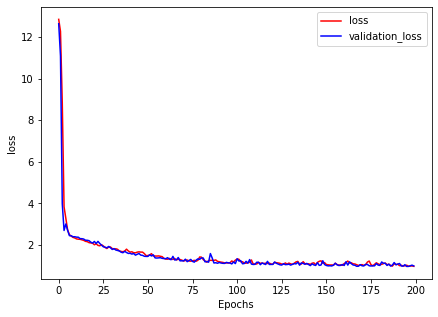

In [45]:
plt.figure(figsize=(7,5))
plt.plot(losses['loss'], color='r')
plt.plot(losses['val_loss'], color= 'b')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])

In [13]:
nn_model = Sequential()
nn_model.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train_sc.shape[1], activation = 'relu'))
nn_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(1, kernel_initializer='normal', activation= 'linear'))
nn_model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
# nn_model.summary()

NameError: name 'Sequential' is not defined

In [46]:
nn_model.fit(X_train_sc, y_train, epochs=100, batch_size=30, validation_split=0.2, verbose=0)

In [48]:
y_p = nn_model.predict(X_test_sc)
r2_score(y_test, y_p)

0.6958143822720586

<AxesSubplot:>

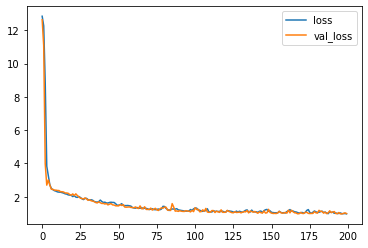

In [49]:
losses[['loss', 'val_loss']].plot()

In [50]:
nn_model = Sequential()
nn_model.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train_sc.shape[1], activation = 'relu'))
nn_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dense(1, kernel_initializer='normal', activation= 'linear'))
nn_model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
# nn_model.summary()

In [55]:
nn_model.fit(X_train_sc, y_train, epochs=150, batch_size=30, validation_split=0.2, verbose=0)

In [56]:
y_pred = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.6590970159476371

In [59]:
nn_model.fit(X_train_sc, y_train, epochs=300, batch_size=30, validation_split=0.2, verbose=0)

In [60]:
y_pred = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.6978710215342181

In [61]:
nn_model.history.history

{}

In [21]:
# y_pred_w0_scale = nn_model.predict(X_test)
# r2_score(y_test, y_pred_w0_scale)

-1.3877498089652809

In [35]:
y_pred_nn_new = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred_nn_new)

0.5793488621015024

In [37]:
pd.DataFrame(nn_model.history.history)

""


In [54]:
y_pred_nn_new = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred_nn_new)

0.6822388297369701

In [128]:
y_pred_nn_new = nn_model.predict(X_test_sc)
r2_score(y_test, y_pred_nn_new)

0.57425869272021

In [ ]:
#Source: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mean_squared_error(y_test, y_pred_nn2)

25324066.375388034

In [70]:
type(y_pred_nn2)

numpy.ndarray

(82,)

In [86]:
y_nn = y_pred_nn2.flatten()

In [96]:
dfn= pd.DataFrame({'Y_nn':y_nn,'Treu': y_test})

In [98]:
dfn['diff']= dfn['Y_nn']- dfn['Treu'] 

In [99]:
dfn

,Y_nn,Treu,diff
241,755.446594,13.784094,741.662500
299,1181.776245,13.502833,1168.273412
301,1220.811523,13.885555,1206.925969
352,956.489990,15.654718,940.835272
102,4649.906738,16.412411,4633.494327
...,...,...,...
68,6384.238770,16.249403,6367.989367
20,14039.345703,13.044722,14026.300981
153,1102.748291,18.465009,1084.283282
14,11699.763672,13.365940,11686.397732


In [161]:
y_pred_nn= model.predict(X_test) #epoach 300

In [162]:
r2_score(y_test, y_pred_nn)

-197.7713461023503